In [5]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("./data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [3]:
df_test = pd.read_csv("./data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


In [4]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

In [6]:
xgb_model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [150,100,200],
              "learning_rate": [0.05, 0.1,0.16],
             }
grid_search = GridSearchCV(xgb_model, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)

grid_search.fit(X_train, y_train)
grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 12.3min finished


{'learning_rate': 0.16,
 'max_depth': 30,
 'min_child_weight': 3,
 'n_estimators': 100}

In [8]:
XGBoost = xgb.XGBClassifier(learning_rate= 0.16, max_depth= 30, min_child_weight= 3, n_estimators= 100)
XGBoost.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.16, max_delta_step=0, max_depth=30,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [9]:
print(XGBoost.score(X_test, y_test))

0.9156773211567732


In [11]:
Y_pred=XGBoost.predict(X_test)


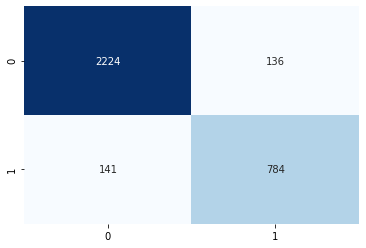

In [12]:
cfm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cfm, cbar=False, annot=True, cmap="Blues", fmt="d")